# Activity 7.01

Importing the required libraries

In [29]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [30]:
url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(url)
soup=BeautifulSoup(response.content,'html.parser')

#Function to check the status of the web request.

def check_status(a):
    if a.status_code == 200:
        print ("We have got the response from the URL")
    else:
        print ("We have not got the response from the URL")

# Calling the function
        
check_status(response)
soup

We have got the response from the URL


<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Top 100 | Project Gutenberg</title>
<link href="/gutenberg/style.css?v=1.1" rel="stylesheet"/>
<link href="/gutenberg/collapsible.css?1.1" rel="stylesheet"/>
<link href="/gutenberg/new_nav.css?v=1.321231" rel="stylesheet"/>
<link href="/gutenberg/pg-desktop-one.css" rel="stylesheet"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="books, ebooks, free, kindle, android, iphone, ipad" name="keywords">
<meta content="wucOEvSnj5kP3Ts_36OfP64laakK-1mVTg-ptrGC9io" name="google-site-verification"/>
<meta content="4WNaCljsE-A82vP_ih2H_UqXZvM" name="alexaVerifyID"/>
<link href="https://www.gnu.org/copyleft/fdl.html" rel="copyright">
<link href="/gutenberg/favicon.ico" rel="icon" sizes="16x16" type="image/png">
<meta content="Project Gutenberg" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://www.gutenberg.org/" proper

In [31]:
#Initiating empty list and using find_all method to get the 'a' which have href attributes

links=[]   
booknum=[]
for tag in soup.find_all('a', href=True):
    links.append(tag['href'])

#print the first 30 elements
    
print("The first 30 elements are\n",links[:30])

#Defining the pattern and compiling it.  We are interested only in /ebooks/[0-9]

pattern=r'/ebooks/[0-9]'
prog=re.compile(pattern)

#Using the for loop and finding only the numbers by using regex [0-9]+, which means any number of repeated numbers

for i in links:
    if prog.search(i):
        i=i.strip()
        n=re.findall('[0-9]+',i)
        booknum.append(n[0])

print("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)        
        



The first 30 elements are
 ['/', '/about/', '/about/', '/policy/collection_development.html', '/about/contact_information.html', '/about/background/', '/policy/permission.html', '/policy/privacy_policy.html', '/policy/terms_of_use.html', '/ebooks/', '/ebooks/', '/ebooks/bookshelf/', '/browse/scores/top', '/ebooks/offline_catalogs.html', '/help/', '/help/', '/help/copyright.html', '/help/errata.html', '/help/file_formats.html', '/help/faq.html', '/policy/', '/help/public_domain_ebook_submission.html', '/help/submitting_your_own_work.html', '/help/mobile.html', '/attic/', '/donate/', '/donate/', '#books-last1', '#authors-last1', '#books-last7']

The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
['1342', '1513', '2701', '84', '2641', '145', '100', '37106', '16389', '67979', '6761', '394', '4085', '2160', '6593', '1259', '5197', '11', '64317', '174', '98', '844', '5200', '345', '2554', '2542', '3543',

In [32]:
print("The first 2000 character output of soup.text is\n",'-'*50,soup.text[:2000])



The first 2000 character output of soup.text is
 -------------------------------------------------- 



Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Do

In [33]:
#Using splitlines and indexing method to find the line "Top 100 EBooks yesterday" .
#As there are two occurences of the index, we are finding the second one.

temp_list=[]

first_start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')
second_start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday',first_start_idx+1)
print("Start index is \n",second_start_idx,'\n')

#Finding the top 100 ebooks by using range function,

for i in range(100):
   temp_list.append(soup.text.splitlines()[second_start_idx +2+i])

print("\nThe list of titles with the numbers is\n",temp_list)

#Initiating a blank list and appending only the name by excluding the numbers using span and regex match.
# Here we are regex matching only the lower/upper case alphabets and space reoccuring any number of times by giving *

lst_titles=[]

for i in range(100):

    id1,id2=re.match('^[a-zA-Z ]*',temp_list[i]).span()

    lst_titles.append(temp_list[i][id1:id2])

    
print('\n\n',"The final list of titles without the numbers is\n\n")
for i in lst_titles:
    print (i)

Start index is 
 121 


The list of titles with the numbers is
 ['Pride and Prejudice by Jane Austen (2421)', 'Romeo and Juliet by William Shakespeare (2336)', 'Moby Dick; Or, The Whale by Herman Melville (2327)', 'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (2114)', 'A Room with a View by E. M.  Forster (1693)', 'Middlemarch by George Eliot (1688)', 'The Complete Works of William Shakespeare by William Shakespeare (1643)', 'Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott (1622)', 'The Enchanted April by Elizabeth Von Arnim (1501)', 'The Blue Castle: a novel by L. M.  Montgomery (1469)', 'The Adventures of Ferdinand Count Fathom — Complete by T.  Smollett (1378)', 'Cranford by Elizabeth Cleghorn Gaskell (1353)', 'The Adventures of Roderick Random by T.  Smollett (1351)', 'The Expedition of Humphry Clinker by T.  Smollett (1348)', 'History of Tom Jones, a Foundling by Henry Fielding (1323)', 'Twenty years after by Alexandre Dumas and Auguste Maqu

# Activity 7.02: Building Your Own Movie Database by Reading an API

In [34]:
#Importing the required libraries

import urllib.request, urllib.parse, urllib.error
import json

In [35]:
# Defining the main website string

omdb="http://www.omdbapi.com/?"

# Obtained the apikeys from the above website manually and saved locally in json format. Using the open function and reading
# the value of the keys

with open('C:\\Users\\Riaz\\Downloads\\apikeys.json') as f:
    
    keys = json.load(f)
    omdbapi = keys['OMDBapi']
url = 'http://www.omdbapi.com/?'

apikey = '&apikey='+omdbapi

In [36]:
# Defining the print function by mentioning the keys in advance.
# Using the for loop in the defined key list and checking if any of these items are there are in the keys of website data obtained.
# If they are present printing them in key:Value format

def print_json(json_data):
    list_keys = ['Title', 'Year', 'Rated', 'Released','Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings','Metascore', 'imdbRating', \
                 'imdbVotes', 'imdbID']
    print("\nThe output obtained is\n\n")
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")

# Defining the function to download the poster of the movie from the obtained website data stored in json_data
            
def save_poster(json_data):
    import os

    # Extracting title and poster url    
    
    title = json_data['Title']
    poster_url = json_data['Poster']
    print ("Poster url is\n",poster_url,"\n")
    #Splitting the poster url by '.' which would give a list and getting the last value for extension
    
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()

    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    
    #Getting the current working directory and creating a new directory. On other intereations existing path will be used
    
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)

    #Saving as a file by appending the CWD and the title obtained from data and extension
        
    filename=savelocation+str(title)+'.'+poster_file_extension
    
    #Opening the file in binary mode and writing the data obtained from website
    
    f=open(filename,'wb')
    f.write(poster_data)
    
    #Closing the file
    
    f.close()         

    #Defining the function by constructing the url and using encoding function of urllib to append the passed dictionary
    #which is t and the value would be the name of the movie.  This would be appended by api key which we manually obtained
    
def search_movie(title):
    
    #Using the try except loop to catch the errors
    
    try:
        
        url = omdb + urllib.parse.urlencode({'t':str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        print ("Json data is \n\n", json_data)
        
        # Checking if we are getting the response as True and Poster has value in it.  If it is, save_poster function is 
        # called and writing to the file
        
        if json_data['Response']=='True':
            print_json(json_data)
            """
            Asks user whether to download the poster of the movie
            """
            if json_data['Poster']!='N/A':
                save_poster(json_data)
            else:
                print("Error encountered: ", json_data['Error'])
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")
    

In [37]:
#Calling the function search_movie and passing the movie name

search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=ab354c3
Json data is 

 {'Title': 'Titanic', 'Year': '1997', 'Rated': 'PG-13', 'Released': '19 Dec 1997', 'Runtime': '194 min', 'Genre': 'Drama, Romance', 'Director': 'James Cameron', 'Writer': 'James Cameron', 'Actors': 'Leonardo DiCaprio, Kate Winslet, Billy Zane', 'Plot': 'A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.', 'Language': 'English, Swedish, Italian, French', 'Country': 'United States, Mexico', 'Awards': 'Won 11 Oscars. 126 wins & 83 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}], 'Metascore': '75', 'imdbRating': '7.9', 'imdbVotes': '1,280,439',

In [38]:
# Calling the function search_movie and passing the wrong movie name and checking,
search_movie("Random_error")
# From the output, we can confirm that the Response key is false and the Error key is Movie not found


Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=ab354c3
Json data is 

 {'Response': 'False', 'Error': 'Movie not found!'}


# Connect to an API of your choice and do a simple data pull - you can use any API - except the API you have selected for your project.

I would be using the API endpoint of the website https://alexwohlbruck.github.io/cat-facts/docs/.

Brief description of the data to be pulled:

The exposed API contains few fun facts about the cats.

In [39]:
# Defining the API endpoint 

caturl='https://cat-fact.herokuapp.com/facts'

# Using requests library making the http call and checking if the status received is valid. If not printing an error

response=requests.get(caturl)
if response.status_code == 200:
    jsonform=response.json()
else:
    print ("Invalid URL, please check")
print ("Here are the cool facts about cats,\n")

# The output is a list of elements and dictionaries within dictionaries.  Looping over the list and using the appropriate 
# keys to extract the relevant text,

for i in range(len(jsonform)):    
    print ((jsonform[i]['text']))
    



Here are the cool facts about cats,

Owning a cat can reduce the risk of stroke and heart attack by a third.
Most cats are lactose intolerant, and milk can cause painful stomach cramps and diarrhea. It's best to forego the milk and just give your cat the standard: clean, cool drinking water.
Domestic cats spend about 70 percent of the day sleeping and 15 percent of the day grooming.
The frequency of a domestic cat's purr is the same at which muscles and bones repair themselves.
Cats are the most popular pet in the United States: There are 88 million pet cats and 74 million dogs.


# 4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. 

In [40]:
#Importing the libraries and loading the data to pandas.

import pandas as pd
import matplotlib.pyplot as plt
population=pd.read_excel(r"C:\Users\Riaz\Downloads\world-population.xlsm")

#Reading the dataframe,

print ("The loaded population dataframe is\n\n",population.head())

The loaded population dataframe is

    Year  Population
0  1960  3028654024
1  1961  3068356747
2  1962  3121963107
3  1963  3187471383
4  1964  3253112403


Text(0, 0.5, 'Population in exponent of 9')

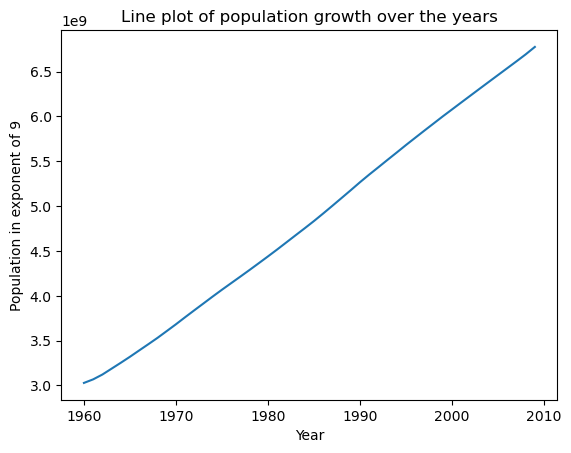

In [41]:
# Plotting line plot using matplotlib

plt.plot(population['Year'],population['Population'])
plt.title("Line plot of population growth over the years")
plt.xlabel("Year")
plt.ylabel("Population in exponent of 9")

Text(0, 0.5, 'Population in exponent of 9')

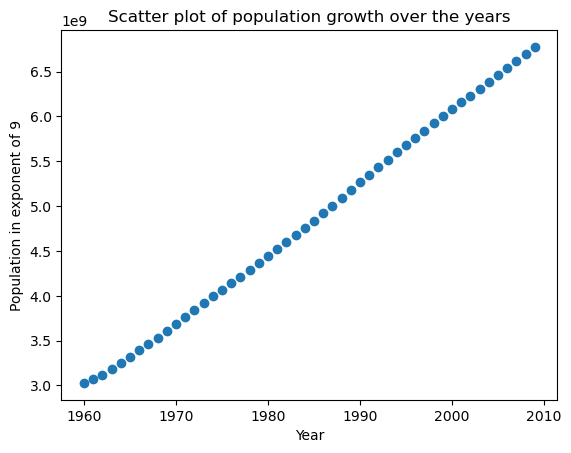

In [42]:
# Plotting scatter plot using matplotlib

plt.scatter(population['Year'],population['Population'])
plt.title("Scatter plot of population growth over the years")
plt.xlabel("Year")
plt.ylabel("Population in exponent of 9")

Text(0, 0.5, 'Population in exponent of 9')

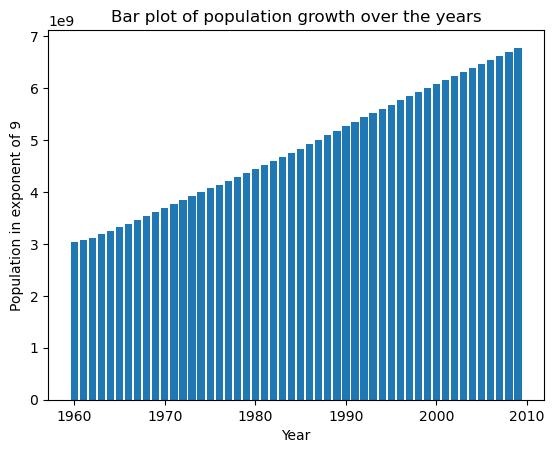

In [43]:
# Plotting bar plot using matplotlib

plt.bar(population['Year'],population['Population'])
plt.title("Bar plot of population growth over the years")
plt.xlabel("Year")
plt.ylabel("Population in exponent of 9")

Text(0, 0.5, 'Frequency')

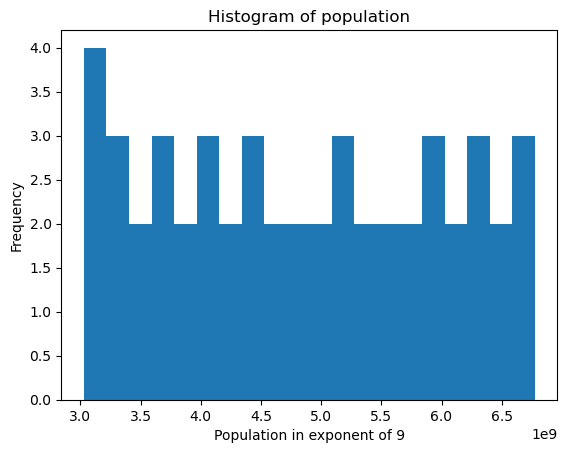

In [44]:
# Plotting histogram using matplotlib, with the bins specification

plt.hist(population['Population'],bins=20)
plt.title("Histogram of population")
plt.xlabel("Population in exponent of 9")
plt.ylabel("Frequency")

C:\Users\Riaz\AppData\Local\Temp\ipykernel_28552\2009754204.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(population['Population'], hist=False, kde=True, rug=True,color='blue', kde_kws={'shade': True})
C:\Users\Riaz\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Text(0.5, 1.0, 'Density Plot of population using Seaborn')

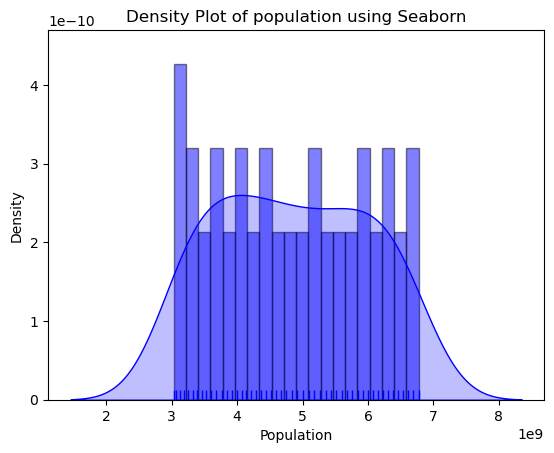

In [45]:
# Plotting histogram using matplotlib, with the bins specification. 
# Here histogram is also plotted separately using matplotlib in addition to density plot
# Density plot has been plotted with seaborn


import seaborn as sns
plt.hist(population['Population'], bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')  # Histogram
sns.distplot(population['Population'], hist=False, kde=True, rug=True,color='blue', kde_kws={'shade': True})
plt.xlabel('Population')
plt.ylabel('Density')
plt.title('Density Plot of population using Seaborn')



Text(0.5, 1.0, 'Pie Chart Example')

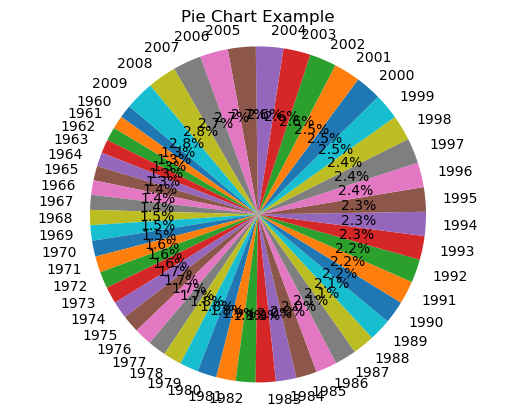

In [46]:
plt.pie(population['Population'], labels=population['Year'], autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Pie Chart Example')